<h1><center>IE 5400 Assignment 3</center></h1>

# Question 1 (60%)
a. Read the paper regarding Caesarian Section prediction. The dataset of 80 samples, posted on Canvas, includes five numerical and categorical variables to represent patient conditions in two classes (C-section = Yes and C-section = No).

In [136]:
# Libraries
import numpy as np
import pandas as pd

In [137]:
# Load dataset
C_section = pd.read_csv('CSection.csv')
C_section

,Age,Delivery_No,Delivery_Time,BP,Heart,Caesarian
0,20,1,Latecomer,High,apt,0
1,22,1,Latecomer,High,apt,1
2,31,1,Latecomer,High,inept,1
3,18,1,Premature,High,inept,0
4,25,1,Premature,High,apt,1
...,...,...,...,...,...,...
75,32,3,Timely,Normal,inept,1
76,32,3,Timely,Normal,apt,0
77,37,3,Timely,Normal,inept,0
78,36,4,Timely,High,inept,0


b. Implement decision tree (DT) classifier in a 20:80 validation in Python. Compare your results with the baseline shown in Table 2 in the paper. You need to present the same information. You may try some ‘tricks’ (e.g., prune the DT) to improve your accuracy balancing between training and testing subsets. Note that the result shown in the paper is based on the whole dataset as the training dataset.

In [138]:
# Change column values
C_section['Delivery_Time'] = C_section['Delivery_Time'].replace(['Latecomer','Timely','Premature'],[3, 2, 1])
C_section['BP'] = C_section['BP'].replace(['High','Normal','Low'],[3, 2, 1])
C_section['Heart'] = C_section['Heart'].replace(['apt', 'inept'], [1, 0])
C_section

,Age,Delivery_No,Delivery_Time,BP,Heart,Caesarian
0,20,1,3,3,1,0
1,22,1,3,3,1,1
2,31,1,3,3,0,1
3,18,1,1,3,0,0
4,25,1,1,3,1,1
...,...,...,...,...,...,...
75,32,3,2,2,0,1
76,32,3,2,2,1,0
77,37,3,2,2,0,0
78,36,4,2,3,0,0


In [139]:
X = C_section.iloc[:, 0:5].values
Y = C_section.iloc[:, 5].values 

In [140]:
# Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [141]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [142]:
# Feature Scaling (normalization)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X = sc.fit_transform(X)

In [143]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

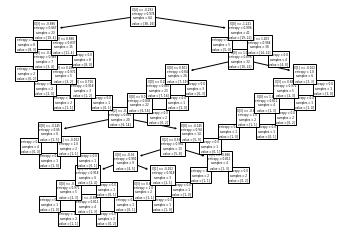

In [144]:
# Output the Tree
from sklearn import tree

tree_plot=tree.plot_tree(classifier.fit(X_train, Y_train)) 

In [145]:
# Training Accuracy

Y_trainAcc = classifier.predict(X_train)
cm = confusion_matrix(Y_train, Y_trainAcc)
print(cm)
print(classification_report(Y_train, Y_trainAcc))

[[38  0]
 [ 3 23]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        38
           1       1.00      0.88      0.94        26

    accuracy                           0.95        64
   macro avg       0.96      0.94      0.95        64
weighted avg       0.96      0.95      0.95        64



In [146]:
#Another Way to output the tree
n_nodes = classifier.tree_.node_count
children_left = classifier.tree_.children_left
children_right = classifier.tree_.children_right
feature = classifier.tree_.feature
threshold = classifier.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

The binary tree structure has 57 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 4] <= -0.29308032989501953 else to node 12.
	node=1 test node: go to node 2 if X[:, 3] <= -0.6859943270683289 else to node 3.
		node=2 leaf node.
		node=3 test node: go to node 4 if X[:, 3] <= 0.6859943270683289 else to node 11.
			node=4 test node: go to node 5 if X[:, 0] <= -0.14463200606405735 else to node 6.
				node=5 leaf node.
				node=6 test node: go to node 7 if X[:, 0] <= 0.2859004884958267 else to node 8.
					node=7 leaf node.
					node=8 test node: go to node 9 if X[:, 0] <= 0.7164330035448074 else to node 10.
						node=9 leaf node.
						node=10 leaf node.
			node=11 leaf node.
	node=12 test node: go to node 13 if X[:, 0] <= -1.2209632396697998 else to node 14.
		node=13 leaf node.
		node=14 test node: go to node 15 if X[:, 1] <= 1.2025799453258514 else to node 56.
			node=15 test node: go to node 16 if X[:, 0] <= 1.0393323600292206 else to node 47.
				nod

c. Apply association rule mining (Apriori algorithm) to find strong association rules (compared to the results on page 39 in Lecturenote 09) . You need to determine settings minsup and minconf by yourself. Note that some features are numerical, so you decide a reasonable approach to convert them into a categorical format to ensure ‘strong’ rules with ‘high’ support and ‘high’ confidence.

In [147]:
df2 = pd.read_csv('CSection.csv')
for col in df2:
    print(df2[col].unique())

[20 22 31 18 25 36 26 27 28 32 24 29 33 35 17 21 23 19 30 40 38 37]
[1 2 3 4]
['Latecomer' 'Premature' 'Timely']
['High' 'Low' 'Normal']
['apt' 'inept']
[0 1]


In [148]:
df_binarized=pd.DataFrame()

In [149]:
df_binarized['Age_0-17']=(df2['Age'] <= 17)
df_binarized['Age_18-35']=((df2['Age'] > 17) & (df2['Age'] <= 35))
df_binarized['Age_36+']=(df2['Age'] > 35)

In [150]:
df_binarized['Delivery_No_1']=(df2['Delivery_No'] == 1)
df_binarized['Delivery_No_2']=(df2['Delivery_No'] == 2)
df_binarized['Delivery_No_3']=(df2['Delivery_No'] == 3)
df_binarized['Delivery_No_4']=(df2['Delivery_No'] == 4)

In [151]:
df_binarized['Delivery_Time_P']=(df2['Delivery_Time'] == 'Premature')
df_binarized['Delivery_Time_T']=(df2['Delivery_Time'] == 'Timely')
df_binarized['Delivery_Time_L']=(df2['Delivery_Time'] == 'Latecomer')

In [152]:
df_binarized['BP_L']=(df2['BP'] == 'Low')
df_binarized['BP_N']=(df2['BP'] == 'Normal')
df_binarized['BP_H']=(df2['BP'] == 'High')

In [153]:
df_binarized['Heart_apt']=(df2['Heart'] == 'apt')
df_binarized['Heart_inept']=(df2['Heart'] == 'inept')

In [154]:
df_binarized['Caesarian_Ture']=(df2['Caesarian'] == 1)
df_binarized['Caesarian_False']=(df2['Caesarian'] == 0)

In [155]:
from mlxtend.frequent_patterns import apriori

In [156]:
frequent_itemsets = apriori(df_binarized, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.9125,(Age_18-35)
1,0.5125,(Delivery_No_1)
2,0.3375,(Delivery_No_2)
3,0.2125,(Delivery_Time_P)
4,0.5750,(Delivery_Time_T)
...,...,...
60,0.2375,"(BP_N, Heart_apt, Delivery_Time_T)"
61,0.2250,"(BP_N, Caesarian_Ture, Heart_apt)"
62,0.2000,"(Delivery_No_1, Caesarian_Ture, Heart_apt, Age..."
63,0.2250,"(Age_18-35, Heart_apt, Delivery_Time_T, BP_N)"


In [157]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Delivery_No_1),(Age_18-35),0.5125,0.9125,0.4625,0.902439,0.988974,-0.005156,0.896875
1,(Age_18-35),(Delivery_No_1),0.9125,0.5125,0.4625,0.506849,0.988974,-0.005156,0.988542
2,(Delivery_No_2),(Age_18-35),0.3375,0.9125,0.3375,1.000000,1.095890,0.029531,inf
3,(Age_18-35),(Delivery_No_2),0.9125,0.3375,0.3375,0.369863,1.095890,0.029531,1.051359
4,(Age_18-35),(Delivery_Time_P),0.9125,0.2125,0.2000,0.219178,1.031426,0.006094,1.008553
...,...,...,...,...,...,...,...,...,...
211,"(Heart_apt, Age_18-35)","(BP_N, Caesarian_Ture)",0.5875,0.2875,0.2125,0.361702,1.258094,0.043594,1.116250
212,(BP_N),"(Caesarian_Ture, Heart_apt, Age_18-35)",0.5000,0.3375,0.2125,0.425000,1.259259,0.043750,1.152174
213,(Caesarian_Ture),"(BP_N, Heart_apt, Age_18-35)",0.4250,0.3500,0.2125,0.500000,1.428571,0.063750,1.300000
214,(Heart_apt),"(BP_N, Caesarian_Ture, Age_18-35)",0.6250,0.2750,0.2125,0.340000,1.236364,0.040625,1.098485


In [158]:
rules = rules[(rules['consequents']==frozenset(['Caesarian_Ture']))|
            (rules['consequents']==frozenset(['Caesarian_False']))]

In [159]:
rules = rules.reset_index(drop=True)
rules.sort_values(by=['confidence'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(Heart_inept),(Caesarian_False),0.3750,0.575,0.3000,0.800000,1.391304,0.084375,2.125000
17,"(Heart_inept, Age_18-35)",(Caesarian_False),0.3250,0.575,0.2500,0.769231,1.337793,0.063125,1.841667
5,(Delivery_Time_T),(Caesarian_False),0.5750,0.575,0.3750,0.652174,1.134216,0.044375,1.221875
13,"(Delivery_Time_T, Age_18-35)",(Caesarian_False),0.5125,0.575,0.3250,0.634146,1.102863,0.030313,1.161667
19,"(BP_N, Heart_apt)",(Caesarian_Ture),0.3625,0.425,0.2250,0.620690,1.460446,0.070938,1.515909
20,"(Delivery_No_1, Heart_apt, Age_18-35)",(Caesarian_Ture),0.3250,0.425,0.2000,0.615385,1.447964,0.061875,1.495000
21,"(BP_N, Heart_apt, Age_18-35)",(Caesarian_Ture),0.3500,0.425,0.2125,0.607143,1.428571,0.063750,1.463636
14,"(BP_N, Age_18-35)",(Caesarian_Ture),0.4625,0.425,0.2750,0.594595,1.399046,0.078438,1.418333
18,"(Delivery_No_1, Heart_apt)",(Caesarian_Ture),0.3625,0.425,0.2125,0.586207,1.379310,0.058438,1.389583
6,(BP_N),(Caesarian_Ture),0.5000,0.425,0.2875,0.575000,1.352941,0.075000,1.352941


In [160]:
Dummy = np.zeros(shape=(rules.shape[0],df_binarized.shape[1]))
Rules = pd.DataFrame(Dummy, columns = df_binarized.columns).astype(int)
Rules.head()

,Age_0-17,Age_18-35,Age_36+,Delivery_No_1,Delivery_No_2,Delivery_No_3,Delivery_No_4,Delivery_Time_P,Delivery_Time_T,Delivery_Time_L,BP_L,BP_N,BP_H,Heart_apt,Heart_inept,Caesarian_Ture,Caesarian_False
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [161]:
for i in list(df_binarized.columns):
    Rules.loc[rules['antecedents'].astype(str).str.contains(i) | rules['consequents'].astype(str).str.contains(i),i] =1
Rules.head()

,Age_0-17,Age_18-35,Age_36+,Delivery_No_1,Delivery_No_2,Delivery_No_3,Delivery_No_4,Delivery_Time_P,Delivery_Time_T,Delivery_Time_L,BP_L,BP_N,BP_H,Heart_apt,Heart_inept,Caesarian_Ture,Caesarian_False
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [162]:
Rules.to_csv("Rules.csv",index=False)

d. Compare the resulting rules and associated accuracy from Part (b) and Part (c). Explain your findings from the comparison. They may or may not be similar or the same to each other.

For part (b), the results looked pretty accurate with a 96% accuracy. Part (c) looked okay based on the confidence levels, although some of the confidence levels were not great, but most were good overall.

e. Implement a logistical regression analysis for the whole dataset (as the training set) and explain the feature importance correlating to diagnosis outcome?

In [163]:
# Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [164]:
# Get coeffiencts of each variables
classifier.coef_ 

array([[ 0.17423252, -0.32774654, -0.12454177,  0.02334462,  0.71479387]])

In [165]:
# Training Accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_trainAcc = classifier.predict(X_train)
cm = confusion_matrix(Y_train, Y_trainAcc)
print(cm)
print(classification_report(Y_train, Y_trainAcc))

[[28 10]
 [11 15]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73        38
           1       0.60      0.58      0.59        26

    accuracy                           0.67        64
   macro avg       0.66      0.66      0.66        64
weighted avg       0.67      0.67      0.67        64



In [166]:
# Testing Accuracy

Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(classification_report(Y_test, Y_pred))

[[6 2]
 [7 1]]
              precision    recall  f1-score   support

           0       0.46      0.75      0.57         8
           1       0.33      0.12      0.18         8

    accuracy                           0.44        16
   macro avg       0.40      0.44      0.38        16
weighted avg       0.40      0.44      0.38        16



f. Implement SVM for the whole dataset (as the training set) and explain the model with support vectors?

I used the SVC method of svm class to create my SVM algorithm. I used a linear kernel.


In [167]:
# Linear Kernel
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [168]:
classifier.coef_

array([[ 7.31980241e-04, -5.11256264e-01, -6.28191021e-04,
        -2.13795630e-05,  9.59196142e-01]])

In [169]:
# Training Accuracy
Y_trainAcc = classifier.predict(X_train)
cm = confusion_matrix(Y_train, Y_trainAcc)
print(cm)
print(classification_report(Y_train, Y_trainAcc))

[[23 15]
 [ 4 22]]
              precision    recall  f1-score   support

           0       0.85      0.61      0.71        38
           1       0.59      0.85      0.70        26

    accuracy                           0.70        64
   macro avg       0.72      0.73      0.70        64
weighted avg       0.75      0.70      0.70        64



In [170]:
#Testing Accuracy

Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(classification_report(Y_test, Y_pred))

[[5 3]
 [3 5]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.62      0.62      0.62         8

    accuracy                           0.62        16
   macro avg       0.62      0.62      0.62        16
weighted avg       0.62      0.62      0.62        16



# Question 2 (10%)
The coronary artery bypass grafting (CABG) database of the Providence Health System is analyzed using logistic regression to predict the risk of death. Two important variables are selected in analysis: patient age at operation (AGE) and a history of acute or chronic renal insufficiency (RENAL). AGE is a continuous variable measured in years and RENAL is a dichotomous variable coded as either 0 (absent) or 1 (present). RENAL is defined as a history of acute or chronic renal insufficiency or a history of a serum creatinine 2.0 recorded in the clinical record. The analysis result is shown in the following table. (Resource: Understanding Logistic Regression Analysis in Clinical Reports: An Introduction, Richard P. Anderson, Ruyun Jin, and Gary L. Grunkemeier, 2003)

In [171]:
q2 = pd.read_csv('CABG.csv')
q2

,Unnamed: 0,Coeff.,Standard Error,p Value,Odds Ratio,CI Lower Limit,CI Upper Limit
0,AGE,0.073,0.006,< 0.001,1.076,1.062,1.090
1,RENAL,1.162,0.177,< 0.001,3.198,2.259,4.526
2,Constant,-8.868,0.471,< 0.001,NaN,NaN,NaN


a. What is the logistical regression model?

In [172]:
# Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [173]:
# Get coeffiencts of each variables
classifier.coef_ 

array([[ 0.17423252, -0.32774654, -0.12454177,  0.02334462,  0.71479387]])

In [174]:
# Training Accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_trainAcc = classifier.predict(X_train)
cm = confusion_matrix(Y_train, Y_trainAcc)
print(cm)
print(classification_report(Y_train, Y_trainAcc))

[[28 10]
 [11 15]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73        38
           1       0.60      0.58      0.59        26

    accuracy                           0.67        64
   macro avg       0.66      0.66      0.66        64
weighted avg       0.67      0.67      0.67        64



In [175]:
#Testing Accuracy

Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(classification_report(Y_test, Y_pred))

[[6 2]
 [7 1]]
              precision    recall  f1-score   support

           0       0.46      0.75      0.57         8
           1       0.33      0.12      0.18         8

    accuracy                           0.44        16
   macro avg       0.40      0.44      0.38        16
weighted avg       0.40      0.44      0.38        16



b. What are the odds ratios or relative importance of each independent variable in determining the outcome?

c. For 50-year-old patient with RENAL status, what is the probability of death?

In [177]:
AGE = 50
RENAL = 1
Constant = -8.868

prob = (0.073 * AGE) + (1.162 * RENAL) + Constant
print(prob)

# Not in confidence interval
print('For a 50-year-old patient with RENAL status, the probability of death is', 0.001)


-4.056000000000001
For a 50-year-old patient with RENAL status, the probability of death is 0.001


# Question 3 (20%)
Construct a Decision Tree model for the Weather Forecast dataset on pages 7-12 in Lecturenote 09. You are required to compute information gain for choosing variables and splits.


In [115]:
weather = pd.read_csv('weather.csv')
weather

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [116]:
weather['Outlook'] = weather['Outlook'].replace(['sunny', 'overcast', 'rainy'],[3, 2, 1])
weather['Temperature'] = weather['Temperature'].replace(['hot','mild','cool'],[3, 2, 1])
weather['Humidity'] = weather['Humidity'].replace(['high', 'normal'], [1, 0])
weather['Windy'] = weather['Windy'].replace([False, True], [0, 1])
weather['Play'] = weather['Play'].replace(['no', 'yes'], [0, 1])
weather

,Outlook,Temperature,Humidity,Windy,Play
0,3,3,1,0,0
1,3,3,1,1,0
2,2,3,1,0,1
3,1,2,1,0,1
4,1,1,0,0,1
5,1,1,0,1,0
6,2,1,0,1,1
7,3,2,1,0,0
8,3,1,0,0,1
9,1,2,0,0,1


In [117]:
# Note: python start with 0, column 1 means the second column
X = weather.iloc[:, 0:5].values
Y = weather.iloc[:, 4].values

In [118]:
# Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [119]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.05, random_state = 0)

In [120]:
# Feature Scaling (normalization)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X = sc.fit_transform(X)

In [121]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

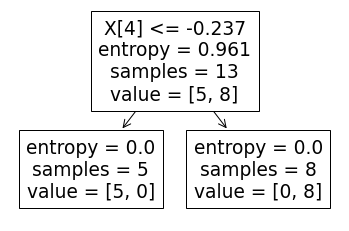

In [122]:
# Output the Tree
from sklearn import tree

tree_plot=tree.plot_tree(classifier.fit(X_train, Y_train)) 

# Question 4 (10%)
Given a dataset of 10 patients, there are two patient variables collected. We aim to develop a SVM classifier for disease prediction (y = 1 for disease and y = -1 for non-disease). The data and SVM results are provided in the table.

a. Write the exact SVM model.

In [123]:
SVM = pd.read_csv('SVM.csv')
SVM

,i,xi1,xi2,yi,ai
0,x1,4.0,2.9,1,0.414
1,x2,4.0,4.0,1,0.000
2,x3,1.0,2.5,-1,0.000
3,x4,2.5,1.0,-1,0.018
4,x5,4.9,4.5,1,0.000
5,x6,1.9,1.9,-1,0.000
6,x7,3.5,4.0,1,0.018
7,x8,0.5,1.5,-1,0.000
8,x9,2.0,2.1,-1,0.414
9,x10,4.5,2.5,1,0.000


In [124]:
X = SVM.iloc[:, [0, 1, 2, 4]].values
Y = SVM.iloc[:, 3].values

In [130]:
# Using SVC method of svm class to use Kernel SVM Algorithm
#Rbf Kernel
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(random_state=0)

In [131]:
#training Accuracy

Y_trainAcc = classifier.predict(X_train)
cm = confusion_matrix(Y_train, Y_trainAcc)
print(cm)
print(classification_report(Y_train, Y_trainAcc))

[[5 0]
 [0 8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         8

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [132]:
#Testing Accuracy

Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(classification_report(Y_test, Y_pred))

[[1]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



b. Predict the outcome of a new patient (3, 4) using this svm model